___
Lab 4

In [48]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape)
print("___")
print(diabetes.DESCR)
print("___")
print(diabetes.data[1])

(442, 10)
___
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature vari

In [49]:
import pandas as pd

# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

print(diabetes_df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of Sklearn Diabetes Data: (442, 11)


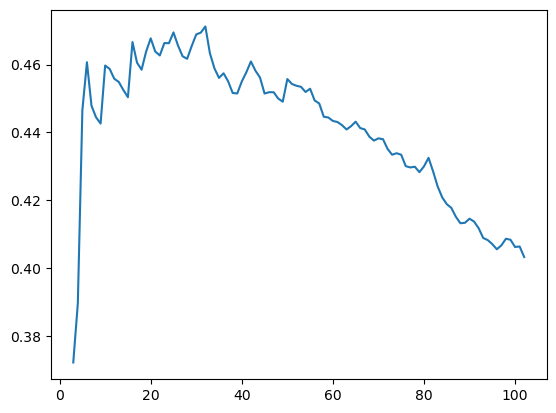

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
diabetes['target'], random_state=42)
from sklearn.neighbors import KNeighborsRegressor
K_max = 100 # maximal number of nearest neighbours to consider
import numpy as np
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+3,results)

In [51]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of samples used i

In [52]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
cross_val_score(knn, X_train, y_train)

array([0.28743721, 0.24283699, 0.32312734, 0.32108514, 0.12845082])

In [58]:
from sklearn.utils import shuffle
X, y = shuffle(diabetes.data, diabetes.target, random_state=42)
print(cross_val_score(knn, X, y))
print(X.shape)
print(y.shape)


[0.37789979 0.36204192 0.29240907 0.43930119 0.35782372]
(442, 10)
(442,)


In [54]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.37222167132521977

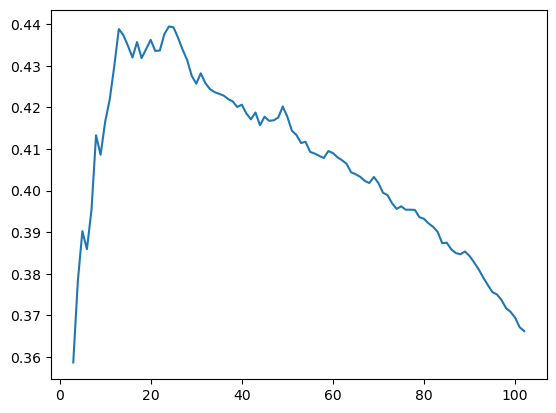

In [55]:
K_max = 100 # maximal number of nearest neighbours to consider
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+3,results)


___
Exercise 1

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()
iris_X, iris_y = iris['data'],iris['target']
knc = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knc, iris_X, iris_y))

(150, 4)
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


cross_val_score splits (X, y) into 5 train_test set and evaluate the score of the set into a list, hence evaluate the mean of cross_val_score returns a general performance on the dataset

___
Exercise 2

Text(0.5, 0.98, 'Diabetes ML Score')

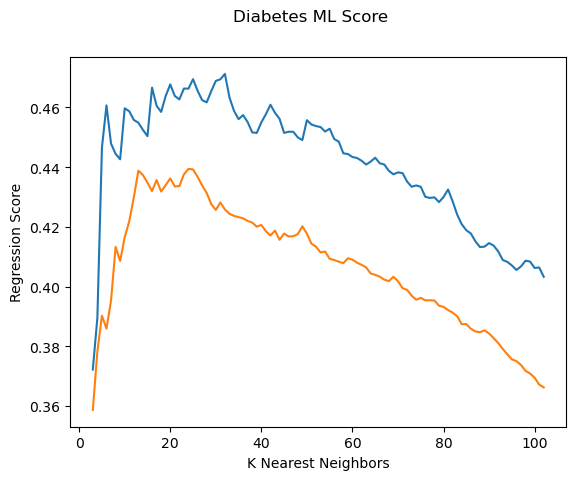

In [64]:
K_max = 100 # maximal number of nearest neighbours to consider
r1 = np.empty(K_max)
r2 = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    r1[k] = np.mean(cross_val_score(knn, X, y))
    knn.fit(X_train, y_train)
    r2[k] = knn.score(X_test, y_test)
plt.plot(np.arange(K_max)+3,r2)
plt.plot(np.arange(K_max)+3,r1)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Regression Score")
plt.suptitle("Diabetes ML Score")

___

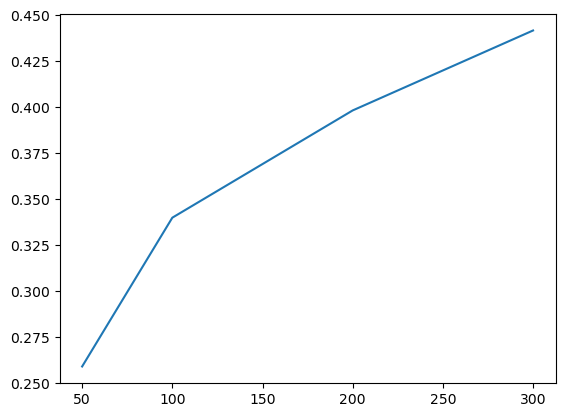

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,100,200,300]) # sizes of training sets
# that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)

___
Exercise 3

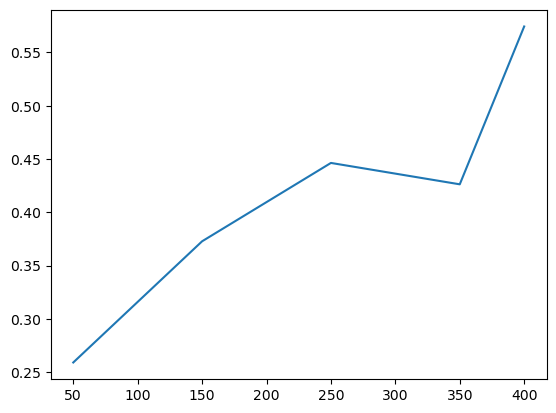

In [70]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,150, 250,350,400]) # sizes of training sets
# that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)

___
Exercise 4

In [71]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

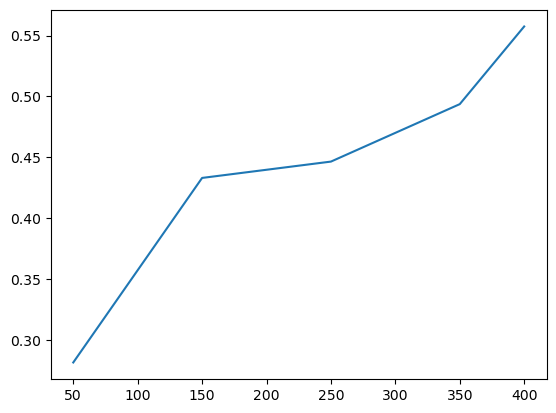

In [73]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,150, 250,350,400]) # sizes of training sets
# that we will try
test_sizes = np.array([250,150, 100,10,40]) # sizes of testing sets
# that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target,test_size=test_sizes[k] , train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)

Yes
___

In [ ]:
n = 99 # we are in the morning of the 100th day
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[-353074.70167273   -7304.41202946   24881.99776619  286794.43604784
  110717.76846564  -57085.53138308  111528.36370572 -358975.43623155
 -499054.87781836 -158149.28707211  197312.17473029  208962.69962904
 -324564.73675625  426697.32407842  163104.88711476 -283860.35738192
 -495994.1438452   338946.82878682  190290.17364331 -233409.08796375
 -143713.759986    366404.00379885 -225686.48037185  249263.32225121
 -310754.87202679  485458.31177486  144466.84815115  437201.75463244
 -291637.97583453  -83450.83021828  175611.37741101 -474338.59651359
  273844.01501435 -309731.98066864   10159.71387711 -204453.70796296
 -267669.1552498   169806.3100984  -167995.66530933  326792.68754292
  125335.93434303 -427305.82122256  439379.28622634  445729.32244765
 -265514.96622381   98310.40275184  225849.92685384 -166461.8706086
  -58213.00143269  203185.24646815 -130432.55206867 -493734.97873866
  478187.38375976 -487789.23219593 -449551.22323918   14511.17655358
  -51153.29880391   12496.3945304  

In [ ]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

249263.32225121278


In [ ]:
np.floor(4.5)

4.0

In [ ]:
import math
def VaR(L):
    """Value at Risk (a primitive conformal predictor)"""
    if L.size>=4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

In [ ]:
N  = 500 # the number of days
# The losses on those days:
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [ ]:
successes = np.empty(N)
for n in range(N):
    # This is what happens on the (n+1)st day:
    V = VaR(L[:n]) # VaR for the (n+1)st day
    if L[n]<=V:
        successes[n] = 1 # our VaR worked
    else:
        successes[n] = 0 # it didn't
print(np.mean(successes))


0.796


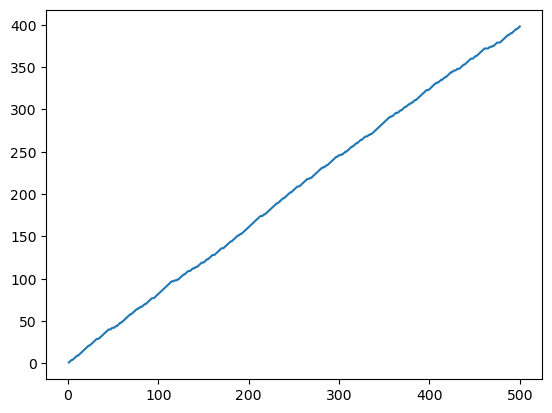

In [ ]:
plt.plot(np.arange(N)+1,np.cumsum(successes))

___
Exercise 5

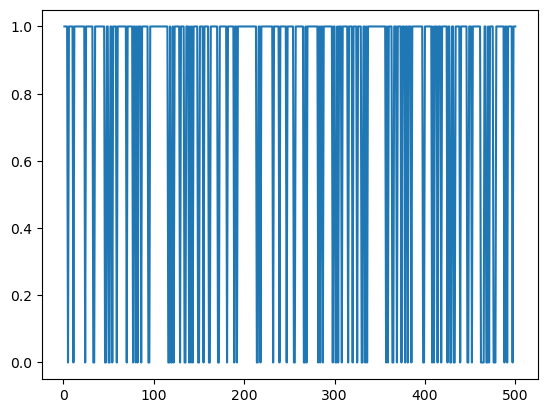

In [77]:
plt.plot(np.arange(N)+1,successes)

In [ ]:
def cumsum(lrr):
    cum = np.empty(N)
    cum[0] = lrr[0]
    for i in range(N):
        cum[i] = lrr[i]+cum[i-1]
    return cum
np.mean()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
    iris['target'], random_state=0)
K_max = 100 # maximal number of nearest neighbours to consider
iris = load_iris()
iris_X, iris_y = iris['data'],iris['target']
knc = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knc, iris_X, iris_y)

r=np.empty(K_max)
for i in range(K_max):
    knn2 = KNeighborsClassifier(n_neighbors=i+3)
    knn2.fit(X_train, y_train)
    r[i]=(knn2.score(X_test, y_test))
%matplotlib inline
plt.plot(np.arange(K_max)+3,results)
plt.plot(np.arange(K_max)+3,np.cumsum(r))


NameError: name 'KNeighborsClassifier' is not defined